# Features from bureau dataset

This notebook creates features from the bureau dataset and displays the distribution of both categorical and numerical features. The bureau dataset contains information regarding past credits (active or closed) provided by other financial institutions that were reported to the Credit Bureau for clients in the application dataset.

In [1]:
# Importing main modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
%matplotlib inline
pd.set_option('display.max_columns', 2000)

# Defining standard plot options
sns.set(font_scale=1.4)
sns.set_style("white")

# Reverting to old color palette
pal = sns.color_palette("deep")
pal = pal.as_hex()
pal[1], pal[2], pal[3] = pal[2], pal[3], pal[1]
sns.set_palette(pal)

In [2]:
# Loading application dataframe from csv file 
application = pd.read_csv("./data/application.csv")

In [3]:
# Reading data files into csv format
bureau = pd.read_csv("./data/bureau.csv")
homecredit_columns_description = pd.read_csv("./data/homecredit_columns_description.csv", encoding="ISO-8859-1")

In [4]:
# Description of columns in bureau dataset
description_application = homecredit_columns_description[homecredit_columns_description["Table"] == "bureau.csv"]
for index, row in description_application.iterrows():
    print(row["Row"], row["Description"])

bureau.head(10)

SK_ID_CURR ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau 
SK_BUREAU_ID Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)
CREDIT_ACTIVE Status of the Credit Bureau (CB) reported credits
CREDIT_CURRENCY Recoded currency of the Credit Bureau credit
DAYS_CREDIT How many days before current application did client apply for Credit Bureau credit
CREDIT_DAY_OVERDUE Number of days past due on CB credit at the time of application for related loan in our sample
DAYS_CREDIT_ENDDATE Remaining duration of CB credit (in days) at the time of application in Home Credit
DAYS_ENDDATE_FACT Days since CB credit ended at the time of application in Home Credit (only for closed credit)
AMT_CREDIT_MAX_OVERDUE Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)
CNT_CREDIT_PROLONG How many times was the Credit Bureau credit prolonged
AMT_CR

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [5]:
# Extraction of features from bureau dataset

# Creating empty lists for each new feature
nb_past_bureau = []
fr_closed_bureau = []
nb_active_bureau = []
fr_active_bureau = []
fr_sold_bureau = []
fr_bd_bureau = []
days_most_recent_bureau = []
days_oldest_bureau = []
average_time_between_bureau = []
nb_credit_overdue_bureau = []
total_days_credit_overdue = []
fr_days_credit_overdue = []
nb_max_overdue_bureau = []
nb_max_overdue_active_bureau = []
sum_max_overdue_bureau = []
fr_max_overdue_bureau = []
nb_sum_overdue_bureau = []
sum_sum_overdue_bureau = []
fr_sum_overdue_bureau = []
nb_prolong_bureau = []
sum_closed_fx_repaid_bureau = []
weighted_avg_days_closed_fx_bureau = []
weighted_avg_days_active_fx_bureau = []
sum_active_fx_bureau = []
fr_active_fx_remaining_bureau = []
sum_active_fx_remaining_bureau = []
nb_fx_bureau = []
sum_fx_bureau = []
fr_sum_remaining_bureau = []
nb_cc_bureau = []
nb_cc_active_bureau = []
sum_debt_cc_bureau = []
fr_debt_cc_bureau = []
sum_sum_cc_bureau = []
total_debt_bureau_application = []
ratio_income_debt_bureau_application = []

counter = 0
lenght = len(application)
for index, row in application.iterrows():
    counter += 1
    sys.stdout.write('\r'+"Progress:"+str(round(counter/lenght*100,1))+"%")
    df = bureau[bureau["SK_ID_CURR"] == row["SK_ID_CURR"]]
    # Number of past bureau credits
    nb_past_bureau.append(len(df))
    if len(df) > 0:
        # Fraction of closed bureau credits
        fr_closed_bureau.append(len(df[df["CREDIT_ACTIVE"] == "Closed"])/len(df))
        # Number of active bureau credits
        nb_active_bureau.append(len(df[df["CREDIT_ACTIVE"] == "Active"]))
        # Fraction of active bureau credits
        fr_active_bureau.append(len(df[df["CREDIT_ACTIVE"] == "Active"])/len(df))
        # Fraction of sold bureau credits
        fr_sold_bureau.append(len(df[df["CREDIT_ACTIVE"] == "Sold"])/len(df))
        # Fraction of bad debt bureau credits
        fr_bd_bureau.append(len(df[df["CREDIT_ACTIVE"] == "Bad debt"])/len(df))
        # Days since most recent bureau application
        days_most_recent_bureau.append(df["DAYS_CREDIT"].max())
        # Days since first recorded bureau application
        days_oldest_bureau.append(df["DAYS_CREDIT"].min())
        # Average time between bureau credit applications
        average_time_between_bureau.append(np.mean(np.diff(df["DAYS_CREDIT"].sort_values())))
        
        # For all credits with days overdue > 0 
        tmp = df[df["CREDIT_DAY_OVERDUE"] > 0]
        nb_credit_overdue_bureau.append(len(tmp))
        if len(df[df["CREDIT_DAY_OVERDUE"] > 0]) > 0:
            # Total number of days with overdue bureau credits
            total_days_credit_overdue.append(df[df["CREDIT_DAY_OVERDUE"] > 0]["CREDIT_DAY_OVERDUE"].sum())
            # Average fraction of time with overdue credit
            fr_days_credit_overdue.append(df[df["CREDIT_DAY_OVERDUE"] > 0]["CREDIT_DAY_OVERDUE"].sum() / -df[df["CREDIT_DAY_OVERDUE"] > 0]["DAYS_CREDIT"].sum())
        else:
            total_days_credit_overdue.append(0)
            fr_days_credit_overdue.append(0)
        
        # For all credits with max overdue > 0    
        tmp = df[df["AMT_CREDIT_MAX_OVERDUE"] > 0]
        # Number of credits with max overdue
        nb_max_overdue_bureau.append(len(tmp))
        # Number of active credits with max overdue
        nb_max_overdue_active_bureau.append(len(tmp[tmp["CREDIT_ACTIVE"] == "Active"]))
        if len(tmp) > 0:
            # Sum of max overdue
            sum_max_overdue_bureau.append(tmp["AMT_CREDIT_MAX_OVERDUE"].sum())
            if tmp["AMT_CREDIT_SUM"].sum() > 0:
                # Fration of credit with max overdue
                fr_max_overdue_bureau.append(tmp["AMT_CREDIT_MAX_OVERDUE"].sum()/tmp["AMT_CREDIT_SUM"].sum())
            else:
                fr_max_overdue_bureau.append(np.NaN)
        else:
            sum_max_overdue_bureau.append(0)
            fr_max_overdue_bureau.append(0)
        
        # For all credits with sum overdue > 0    
        tmp = df[df["AMT_CREDIT_SUM_OVERDUE"] > 0]
        # Number of credits with current overdue
        nb_sum_overdue_bureau.append(len(tmp))
        if len(tmp) > 0:
            # Sum of credits with current overdue
            sum_sum_overdue_bureau.append(tmp["AMT_CREDIT_SUM_OVERDUE"].sum())
            # Fration of credit with current overdue
            if tmp["AMT_CREDIT_SUM"].sum():
                fr_sum_overdue_bureau.append(tmp["AMT_CREDIT_SUM_OVERDUE"].sum()/tmp["AMT_CREDIT_SUM"].sum())
            else:
                fr_sum_overdue_bureau.append(np.NaN)
        else:
            sum_sum_overdue_bureau.append(0)
            fr_sum_overdue_bureau.append(0)
        
        # Number of times credits have been prolonged
        nb_prolong_bureau.append(df[df["CNT_CREDIT_PROLONG"] > 0]["CNT_CREDIT_PROLONG"].sum())
            
        # For closed fixed term credits
        tmp = df[(df["CREDIT_ACTIVE"] == "Closed") & (df["CREDIT_TYPE"] != "Credit card")]
        if len(tmp) > 0:
            # Sum total fixed term credit repaid
            sum_closed_fx_repaid_bureau.append(tmp["AMT_CREDIT_SUM"].sum())
            # Weighted average length of closed fixed term credit
            if tmp["AMT_CREDIT_SUM"].sum() > 0:
                weighted_avg_days_closed_fx_bureau.append((tmp["DAYS_CREDIT_ENDDATE"] - tmp["DAYS_CREDIT"]*tmp["AMT_CREDIT_SUM"]).sum()/tmp["AMT_CREDIT_SUM"].sum())
            else:
                weighted_avg_days_closed_fx_bureau.append(np.NaN)                    
        else:
            sum_closed_fx_repaid_bureau.append(0)
            weighted_avg_days_closed_fx_bureau.append(np.NaN)
            
        # For active fixed term credits
        tmp = df[(df["CREDIT_ACTIVE"] == "Active") & (df["CREDIT_TYPE"] != "Credit card") & (df["DAYS_CREDIT_ENDDATE"] > 0)]
        if len(tmp) > 0:
            # Weighted average length of closed fixed term credit
            if tmp["AMT_CREDIT_SUM"].sum() > 0:
                weighted_avg_days_active_fx_bureau.append((tmp["DAYS_CREDIT_ENDDATE"] - tmp["DAYS_CREDIT"]*tmp["AMT_CREDIT_SUM"]).sum()/tmp["AMT_CREDIT_SUM"].sum())
            else:
                weighted_avg_days_active_fx_bureau.append(np.NaN)
            # Total sum of the active loan (interest rates are ignores)
            sum_active_fx_bureau.append(tmp["AMT_CREDIT_SUM"].sum())
            # Weighted fraction remaining on the loan (interest rates are ignored)
            if tmp["AMT_CREDIT_SUM"].sum() > 0:
                fr_active_fx_remaining_bureau.append(((tmp["DAYS_CREDIT_ENDDATE"]/(tmp["DAYS_CREDIT_ENDDATE"] - tmp["DAYS_CREDIT"])*tmp["AMT_CREDIT_SUM"]).sum()/tmp["AMT_CREDIT_SUM"].sum()))
            else:
                fr_active_fx_remaining_bureau.append(np.NaN)
            # Sum remaining on the loan (interest rates are ignored)
            sum_active_fx_remaining_bureau.append(fr_active_fx_remaining_bureau[-1] * sum_active_fx_bureau[-1])
        else:
            weighted_avg_days_active_fx_bureau.append(np.NaN)
            sum_active_fx_bureau.append(0)
            fr_active_fx_remaining_bureau.append(0)
            sum_active_fx_remaining_bureau.append(0)
            
        # For all fixed term credits
        tmp = df[df["CREDIT_TYPE"] != "Credit card"]
        # Number of fixed term bureau credits
        nb_fx_bureau.append(len(tmp))
        if len(tmp) > 0:
            # Total sum of fixed term bureau credits
            sum_fx_bureau.append(tmp["AMT_CREDIT_SUM"].sum())
            # Fraction of the fixed term bureau credits remaining to be paid
            if tmp["AMT_CREDIT_SUM"].sum() > 0:
                fr_sum_remaining_bureau.append(sum_active_fx_remaining_bureau[-1]/tmp["AMT_CREDIT_SUM"].sum())
            else:
                fr_sum_remaining_bureau.append(np.NaN)
        else:
            sum_fx_bureau.append(0)
            fr_sum_remaining_bureau.append(0)

        # For all credit card credits (revolving credits)  
        tmp = df[df["CREDIT_TYPE"] == "Credit card"]
        # Number of credit cards credits
        nb_cc_bureau.append(len(tmp))
        # Number of active credit cards credits
        nb_cc_active_bureau.append(len(tmp["CREDIT_ACTIVE"] == "Active"))
        if len(tmp) > 0:
            # Total debt on credit card credits
            sum_debt_cc_bureau.append(tmp["AMT_CREDIT_SUM_DEBT"].sum())
            # Fraction of debt compared to available on credit card credits
            if tmp["AMT_CREDIT_SUM"].sum() > 0:
                fr_debt_cc_bureau.append(tmp["AMT_CREDIT_SUM_DEBT"].sum()/tmp["AMT_CREDIT_SUM"].sum())
            else:
                fr_debt_cc_bureau.append(np.NaN)
            # Sum available on credit card credits 
            sum_sum_cc_bureau.append(tmp["AMT_CREDIT_SUM"].sum())
        else:
            sum_debt_cc_bureau.append(0)
            fr_debt_cc_bureau.append(0)
            sum_sum_cc_bureau.append(0)
            
        # Total current debt (including new application)
        total_debt_bureau_application.append(row["AMT_CREDIT"] + sum_debt_cc_bureau[-1] + sum_active_fx_remaining_bureau[-1])
        # Ratio of income over total debt
        ratio_income_debt_bureau_application.append(row["AMT_INCOME_TOTAL"] / total_debt_bureau_application[-1])
        
    else:
        fr_closed_bureau.append(np.NaN)
        nb_active_bureau.append(0)
        fr_active_bureau.append(np.NaN)
        fr_sold_bureau.append(np.NaN)
        fr_bd_bureau.append(np.NaN)
        days_most_recent_bureau.append(np.NaN)
        days_oldest_bureau.append(np.NaN)
        average_time_between_bureau.append(np.NaN)
        nb_credit_overdue_bureau.append(0)
        total_days_credit_overdue.append(0)
        fr_days_credit_overdue.append(0)
        nb_max_overdue_bureau.append(0)
        nb_max_overdue_active_bureau.append(0)
        sum_max_overdue_bureau.append(0)
        fr_max_overdue_bureau.append(0)
        nb_sum_overdue_bureau.append(0)
        sum_sum_overdue_bureau.append(0)
        fr_sum_overdue_bureau.append(0)
        nb_prolong_bureau.append(0)
        sum_closed_fx_repaid_bureau.append(0)
        weighted_avg_days_closed_fx_bureau.append(np.NaN)
        weighted_avg_days_active_fx_bureau.append(np.NaN)
        sum_active_fx_bureau.append(0)
        fr_active_fx_remaining_bureau.append(0)
        sum_active_fx_remaining_bureau.append(0)
        nb_fx_bureau.append(0)
        sum_fx_bureau.append(0)
        fr_sum_remaining_bureau.append(0)
        nb_cc_bureau.append(0)
        nb_cc_active_bureau.append(0)
        sum_debt_cc_bureau.append(0)
        fr_debt_cc_bureau.append(0)
        sum_sum_cc_bureau.append(0)
        total_debt_bureau_application.append(row["AMT_CREDIT"])
        ratio_income_debt_bureau_application.append(row["AMT_INCOME_TOTAL"]/row["AMT_CREDIT"])


Progress:0.0%

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Progress:100.0%

In [6]:
# Function to display description of selected feature
def add_description(table, row, description):
    list_description = [np.NaN, table, row, description, np.NaN]
    homecredit_columns_description.loc[len(homecredit_columns_description)] = list_description
    return homecredit_columns_description

In [7]:
# Creation of new features from bureau dataset
application["nb_past_bureau"] = nb_past_bureau
add_description("bureau.csv", "nb_past_bureau", "Number of past bureau credits")

application["fr_closed_bureau"] = fr_closed_bureau
add_description("bureau.csv", "fr_closed_bureau", "Fraction of closed bureau credits")

application["nb_active_bureau"] = nb_active_bureau
add_description("bureau.csv", "nb_active_bureau", "Number of active bureau credits")

application["fr_active_bureau"] = fr_active_bureau
add_description("bureau.csv", "fr_active_bureau", "Fraction of active bureau credits")

application["fr_sold_bureau"] = fr_sold_bureau
add_description("bureau.csv", "fr_sold_bureau", "Fraction of sold bureau credits")

application["fr_bd_bureau"] = fr_bd_bureau
add_description("bureau.csv", "fr_bd_bureau", "Fraction of bad debt bureau credits")

application["days_most_recent_bureau"] = days_most_recent_bureau
add_description("bureau.csv", "days_most_recent_bureau", "Days since most recent credit application")

application["days_oldest_bureau"] = days_oldest_bureau
add_description("bureau.csv", "days_oldest_bureau", "Days since oldest credit application")

application["average_time_between_bureau"] = average_time_between_bureau
add_description("bureau.csv", "average_time_between_bureau", "Average time between credit applications")

application["nb_credit_overdue_bureau"] = nb_credit_overdue_bureau
add_description("bureau.csv", "nb_credit_overdue_bureau", "Number of overdue credits (days > 0)")

application["total_days_credit_overdue"] = total_days_credit_overdue
add_description("bureau.csv", "total_days_credit_overdue", "Total days overdue")

application["fr_days_credit_overdue"] = fr_days_credit_overdue
add_description("bureau.csv", "fr_days_credit_overdue", "Fraction of credit lenght overdue")

application["nb_max_overdue_bureau"] = nb_max_overdue_bureau
add_description("bureau.csv", "nb_max_overdue_bureau", "Number of credits with max overdue")

application["nb_max_overdue_active_bureau"] = nb_max_overdue_active_bureau
add_description("bureau.csv", "nb_max_overdue_active_bureau", "Number of active credits with max overdue")

application["sum_max_overdue_bureau"] = sum_max_overdue_bureau
add_description("bureau.csv", "sum_max_overdue_bureau", "Sum of max overdue")

application["fr_max_overdue_bureau"] = fr_max_overdue_bureau
add_description("bureau.csv", "fr_max_overdue_bureau", "Fration of credit with max overdue")

application["nb_sum_overdue_bureau"] = nb_sum_overdue_bureau
add_description("bureau.csv", "nb_sum_overdue_bureau", "Number of credits with current overdue")

application["sum_sum_overdue_bureau"] = sum_sum_overdue_bureau
add_description("bureau.csv", "sum_sum_overdue_bureau", "Sum of credits with current overdue")

application["fr_sum_overdue_bureau"] = fr_sum_overdue_bureau
add_description("bureau.csv", "fr_sum_overdue_bureau", "Fration of credit with current overdue")

application["nb_prolong_bureau"] = nb_prolong_bureau
add_description("bureau.csv", "nb_prolong_bureau", "Number of time credits have been prolonged")

application["sum_closed_fx_repaid_bureau"] = sum_closed_fx_repaid_bureau
add_description("bureau.csv", "sum_closed_fx_repaid_bureau", "Sum of closed fixed term credits")

application["weighted_avg_days_closed_fx_bureau"] = weighted_avg_days_closed_fx_bureau
add_description("bureau.csv", "weighted_avg_days_closed_fx_bureau", "Average lenght of closed fixed term credits")

application["weighted_avg_days_active_fx_bureau"] = weighted_avg_days_active_fx_bureau
add_description("bureau.csv", "weighted_avg_days_active_fx_bureau", "Average lenght of active fixed term credits")

application["sum_active_fx_bureau"] = sum_active_fx_bureau
add_description("bureau.csv", "sum_active_fx_bureau", "Sum of active fixed term credits")

application["fr_active_fx_remaining_bureau"] = fr_active_fx_remaining_bureau
add_description("bureau.csv", "fr_active_fx_remaining_bureau", "Fraction remaining on active fixed term credits")

application["sum_active_fx_remaining_bureau"] = sum_active_fx_remaining_bureau
add_description("bureau.csv", "sum_active_fx_remaining_bureau", "Sum remaining on active fixed term credits")

application["nb_fx_bureau"] = nb_fx_bureau
add_description("bureau.csv", "nb_fx_bureau", "Number of fixed term credits")

application["sum_fx_bureau"] = sum_fx_bureau
add_description("bureau.csv", "sum_fx_bureau", "Sum of fixed term credits")

application["fr_sum_remaining_bureau"] = fr_sum_remaining_bureau
add_description("bureau.csv", "fr_sum_remaining_bureau", "Fraction of the fixed term bureau credits remaining to be paid")

application["nb_cc_bureau"] = nb_cc_bureau
add_description("bureau.csv", "nb_cc_bureau", "Number of credit cards credits")

application["nb_cc_active_bureau"] = nb_cc_active_bureau
add_description("bureau.csv", "nb_cc_active_bureau", "Number of active credit cards credits")

application["sum_debt_cc_bureau"] = sum_debt_cc_bureau
add_description("bureau.csv", "sum_debt_cc_bureau", "Total debt on credit cards credits")

application["fr_debt_cc_bureau"] = fr_debt_cc_bureau
add_description("bureau.csv", "fr_debt_cc_bureau", "Fraction of debt over total available on credit cards credits")

application["sum_sum_cc_bureau"] = sum_sum_cc_bureau
add_description("bureau.csv", "sum_sum_cc_bureau", "Total available on credit cards credits")

application["total_debt_bureau_application"] = total_debt_bureau_application
add_description("bureau.csv", "total_debt_bureau_application", "Total debt including active credits and new application")

application["ratio_income_debt_bureau_application"] = ratio_income_debt_bureau_application
add_description("bureau.csv", "ratio_income_debt_bureau_application", "Ratio of income over total debt");

In [8]:
# Saving application dataframe into csv file
application.to_csv("./data/application.csv",index=False)

In [9]:
# Saving homecredit_columns_description dataframe into csv file
homecredit_columns_description.to_csv("./data/homecredit_columns_description.csv",index=False)

In [26]:
discrete_features = ["nb_active_bureau", "nb_credit_overdue_bureau", \
                     "nb_max_overdue_bureau", "nb_max_overdue_active_bureau", "nb_sum_overdue_bureau", \
                     "nb_prolong_bureau", "nb_cc_bureau", "nb_cc_active_bureau"]

continuous_features = ["fr_closed_bureau", "fr_active_bureau", "fr_sold_bureau", "fr_bd_bureau", \
                       "days_most_recent_bureau", "days_oldest_bureau", "average_time_between_bureau", \
                       "total_days_credit_overdue", "fr_days_credit_overdue", "sum_max_overdue_bureau", \
                       "fr_max_overdue_bureau", "sum_sum_overdue_bureau", "fr_sum_overdue_bureau", \
                       "sum_closed_fx_repaid_bureau", "weighted_avg_days_closed_fx_bureau", 
                       "weighted_avg_days_active_fx_bureau", "sum_active_fx_bureau", \
                       "fr_active_fx_remaining_bureau", "sum_active_fx_remaining_bureau", "sum_fx_bureau", 
                       "fr_sum_remaining_bureau", "sum_debt_cc_bureau", "fr_debt_cc_bureau", "sum_sum_cc_bureau", \
                       "total_debt_bureau_application", "ratio_income_debt_bureau_application", "nb_fx_bureau"]


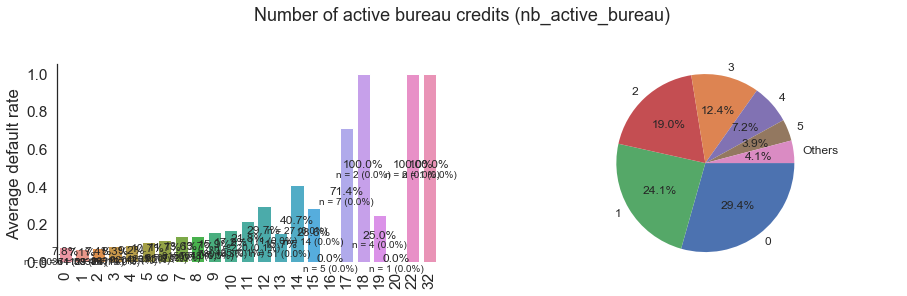

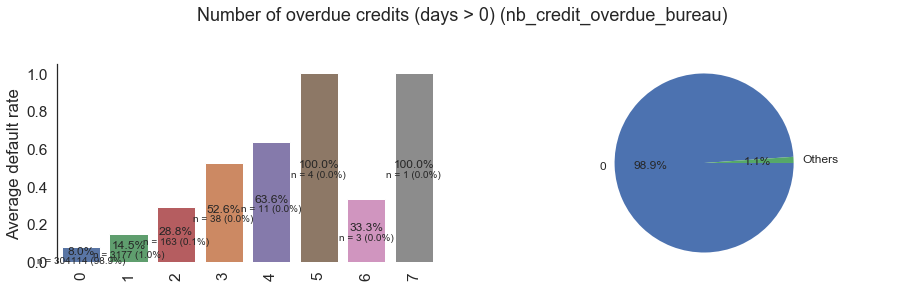

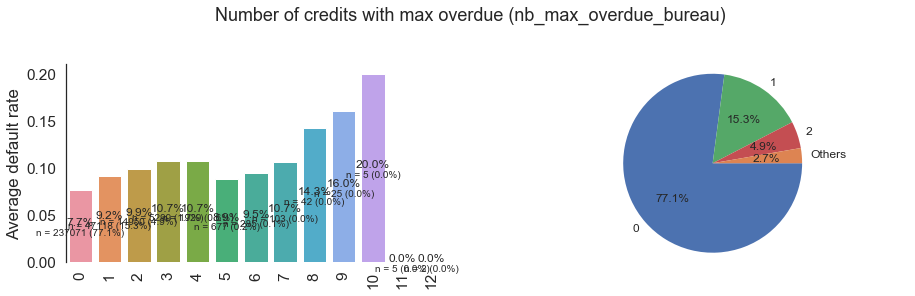

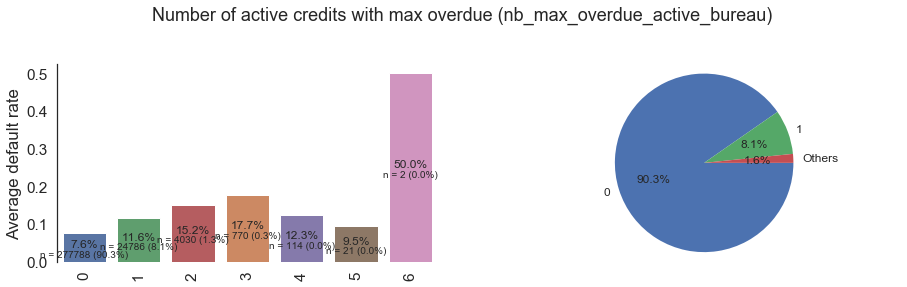

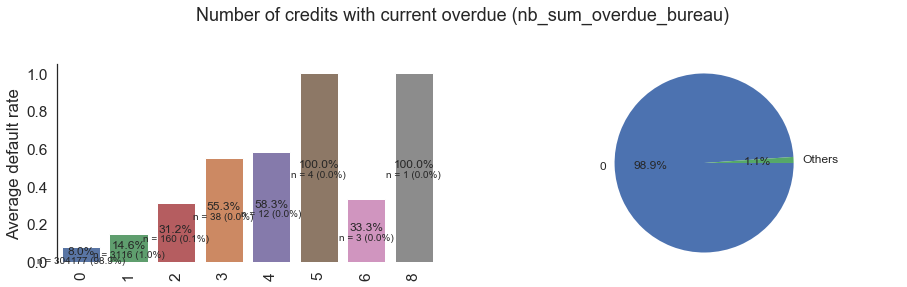

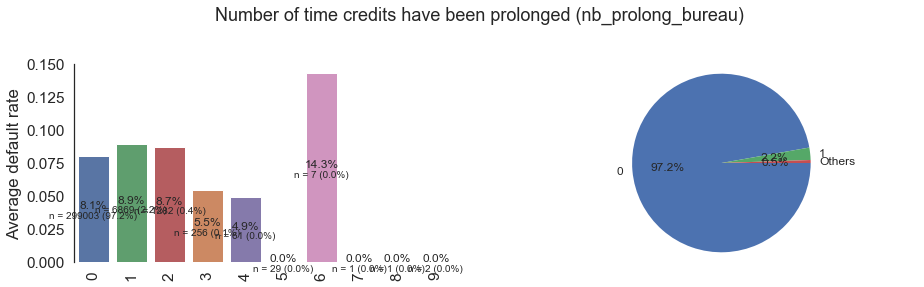

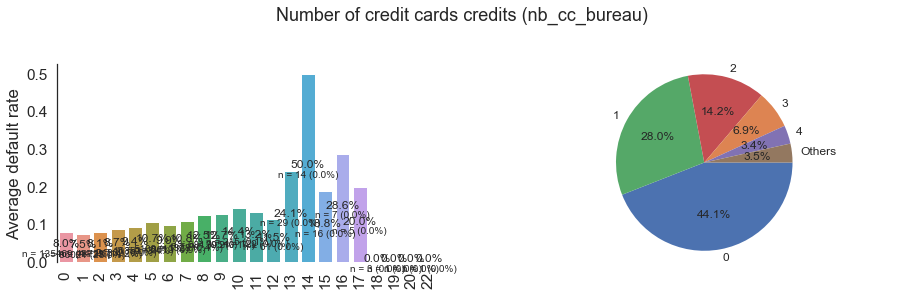

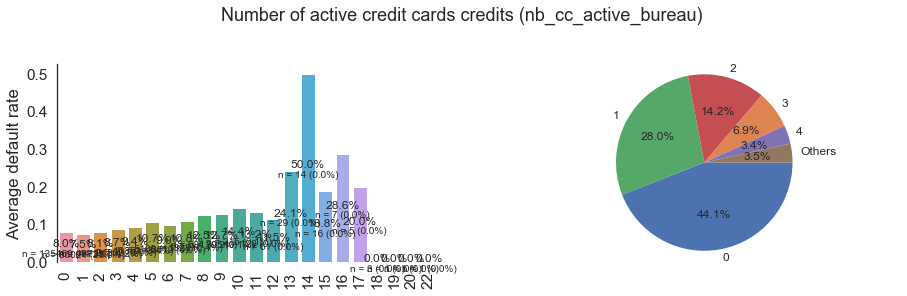

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


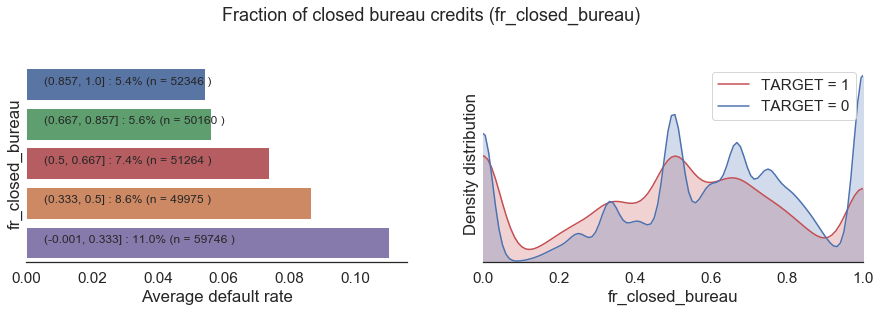

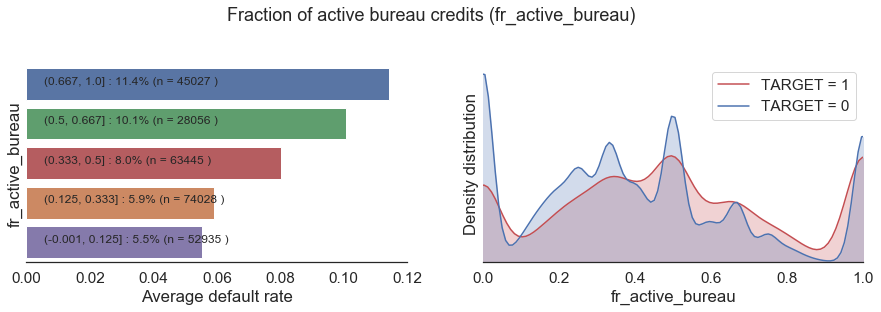

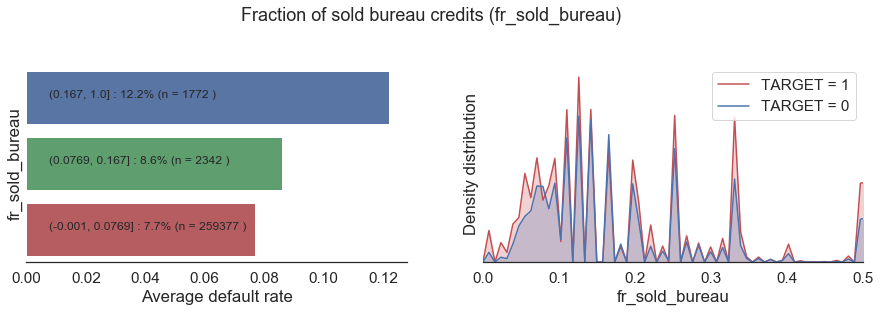

C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


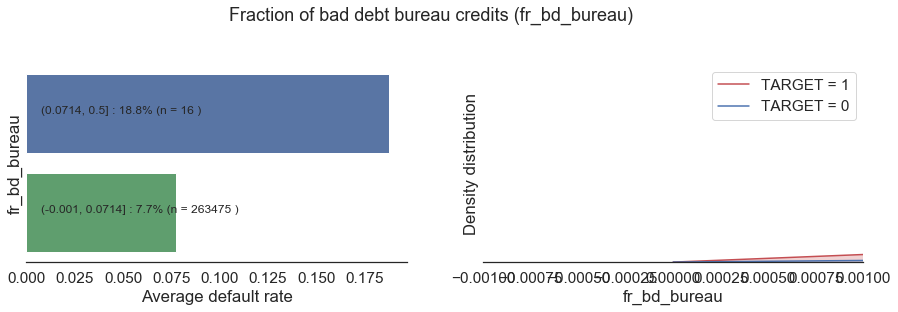

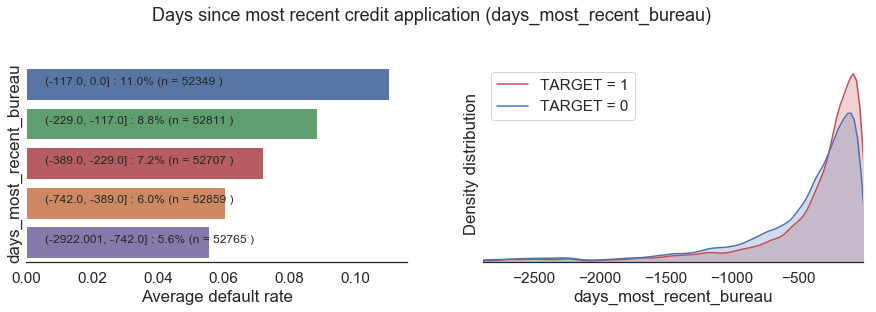

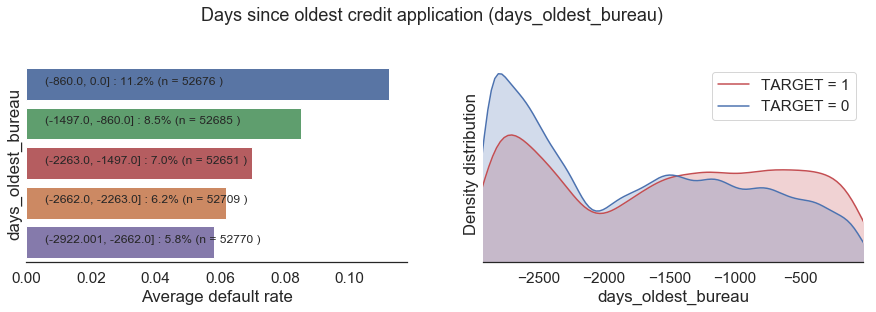

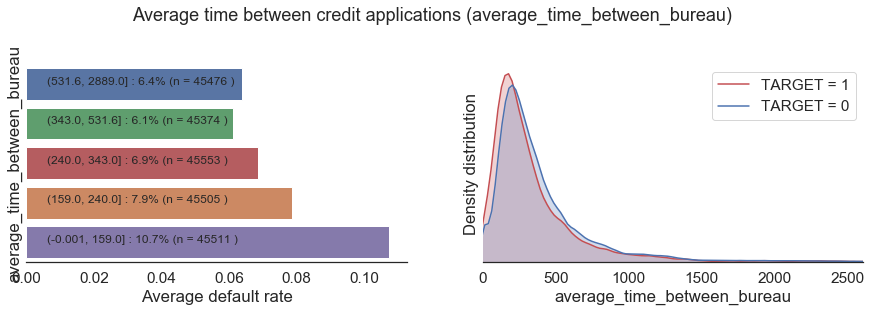

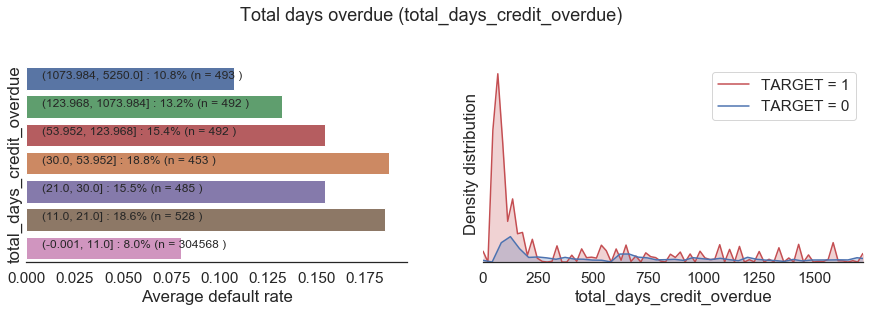

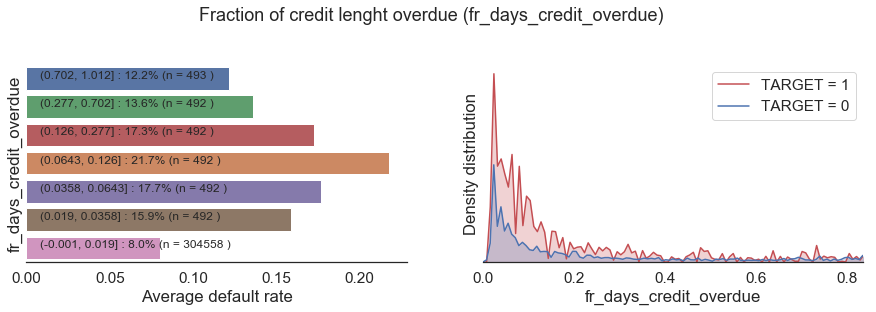

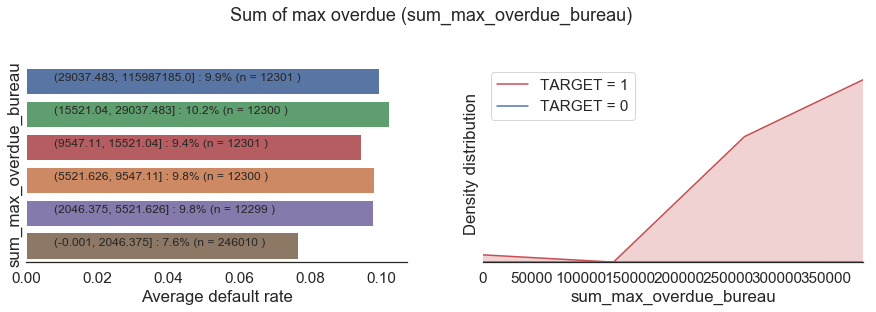

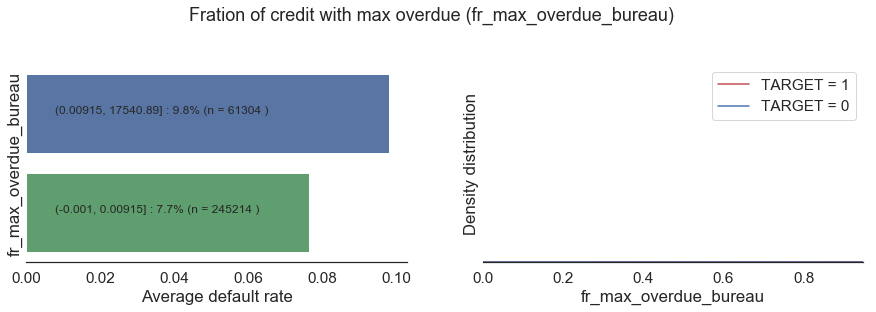

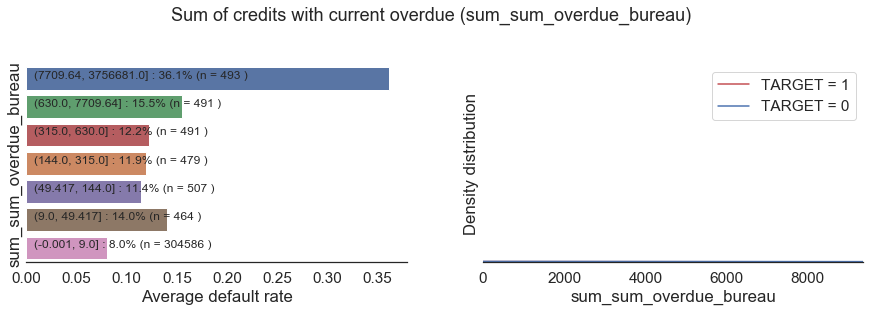

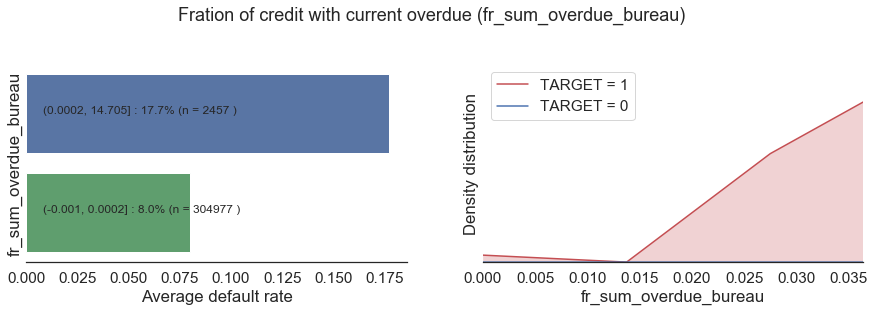

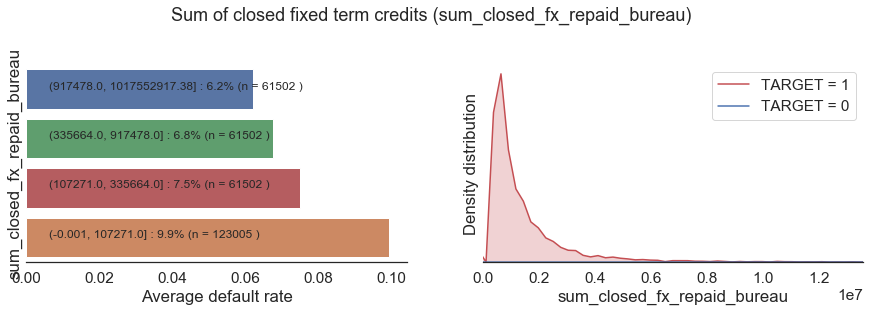

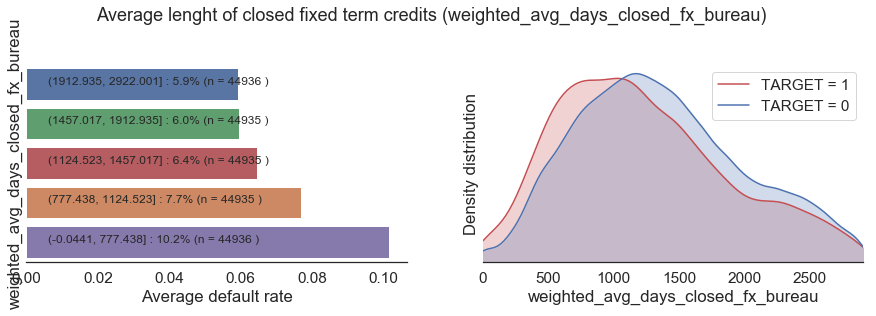

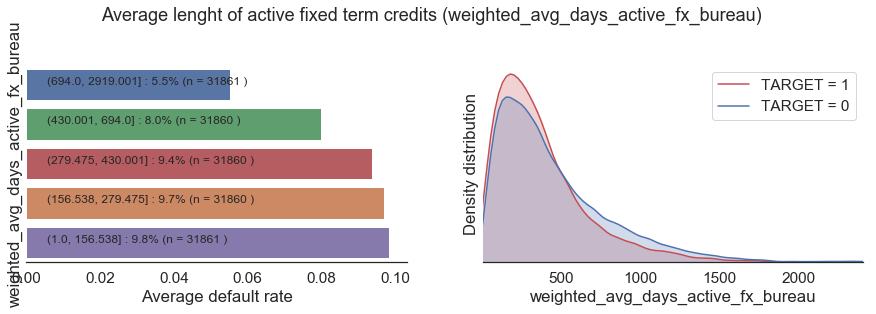

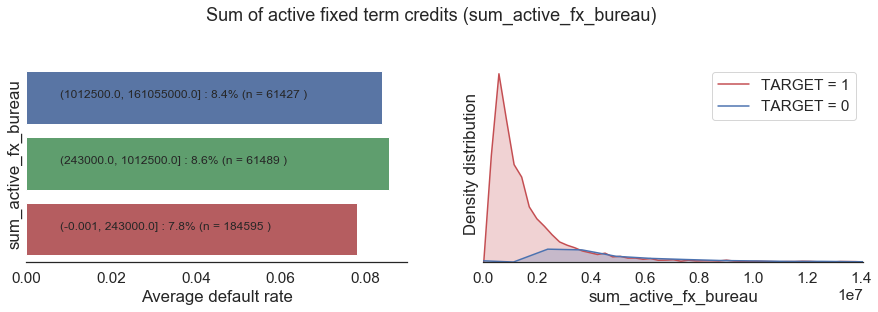

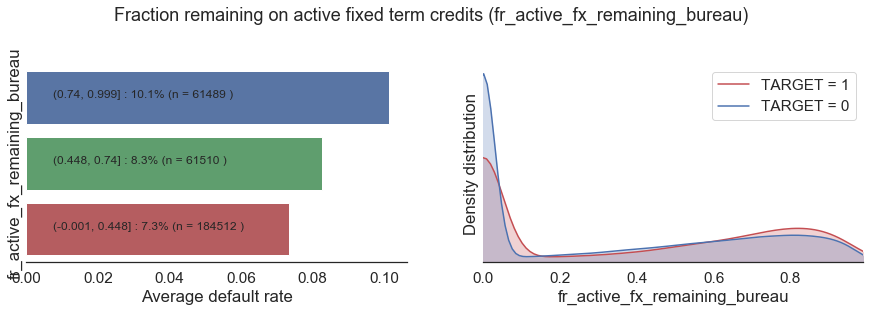

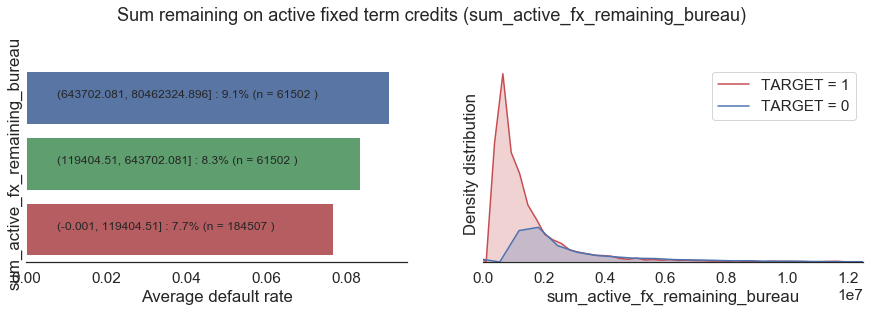

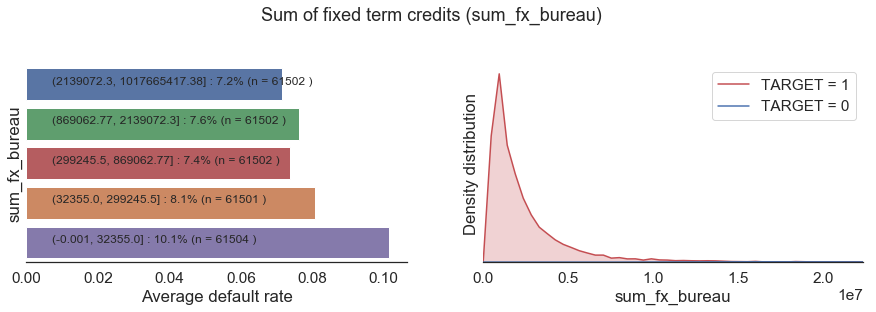

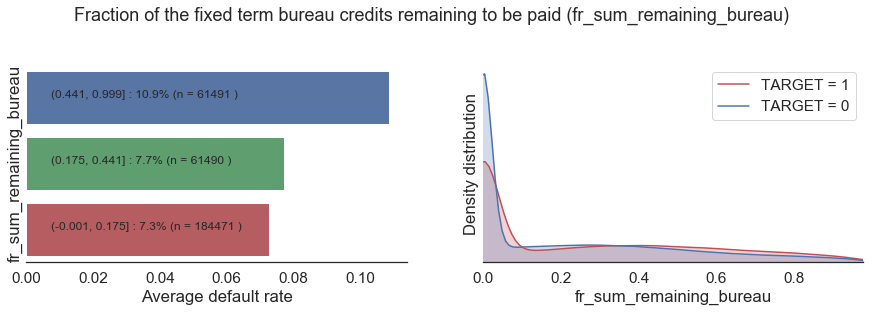

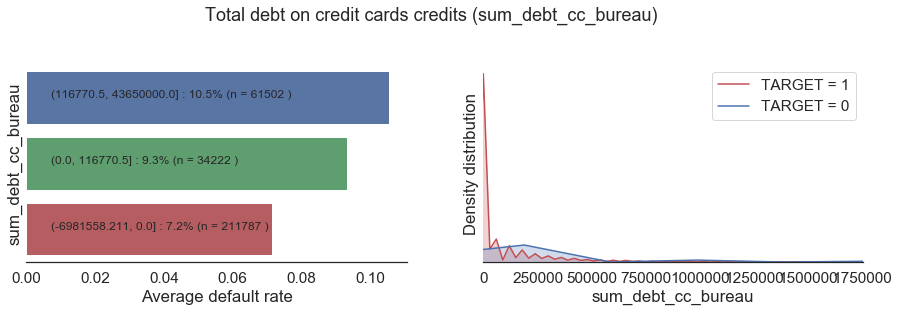

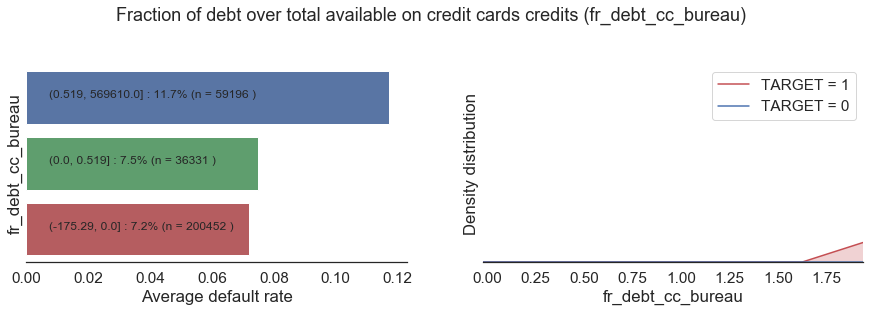

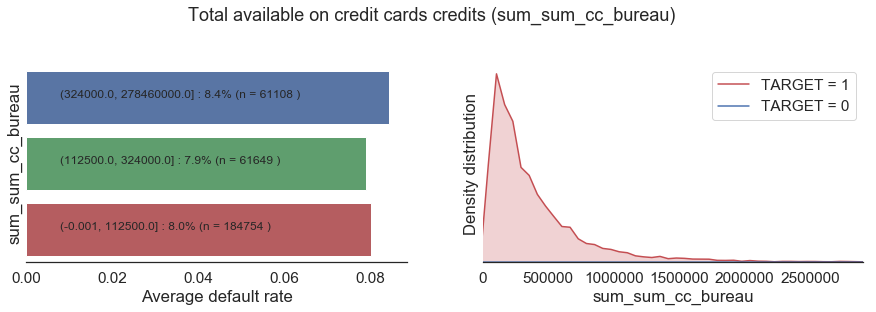

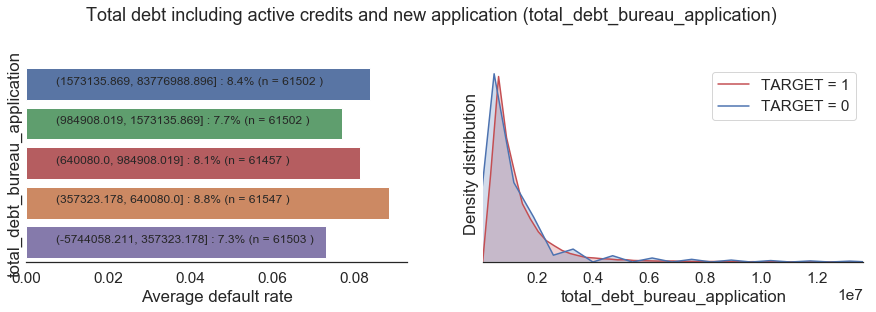

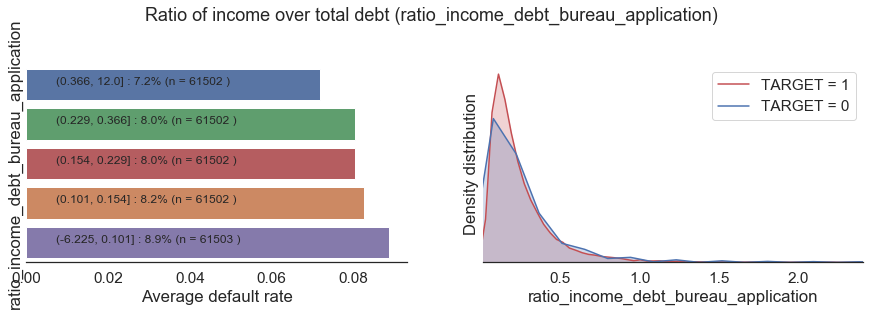

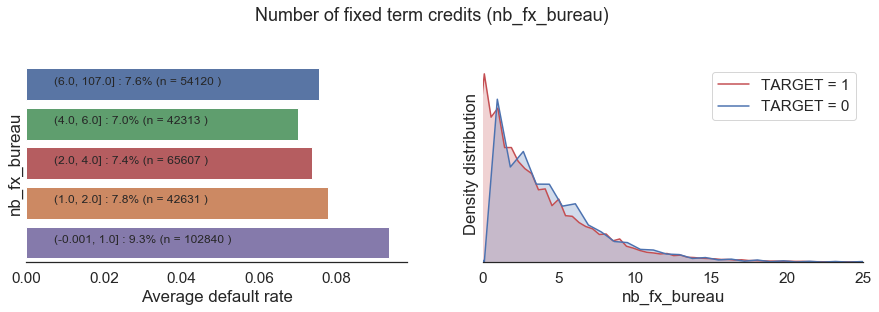

In [27]:
def display_discrete_feature(df, feature, target):
    # Creating figure and axes
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    
    # Print title
    title = homecredit_columns_description[homecredit_columns_description["Row"] == feature]["Description"].tolist()[0] + " (" + feature + ")"
    # If title is too long, reduce font size
    if len(title) <= 100:
        plt.suptitle(title, size = 18)
    else:
        plt.suptitle(title, size = 18*100/len(title))
    
    # Bar plot of mean target as a function of feature value
    df_grouped = df[[feature, target]].groupby([feature]).agg(["mean", "count"])
    # In case of non numerical categorial data, sort by value count
    if type(df_grouped.index[0]) == str:
        df_grouped = df_grouped.sort_values(by = [("TARGET", "count")], ascending = False)
    index = df_grouped.index
    height = df_grouped[("TARGET", "mean")].tolist()
    count = df_grouped[("TARGET", "count")].tolist()
    sns.barplot(index, height, ax = ax1)
    if len(count) >= 5:
        ax1.tick_params(axis='x', rotation=90, labelleft = True)
    ax1.set_xlabel("")
    ax1.set_ylabel('Average default rate')

    sns.despine(bottom=True, ax = ax1)
    # Writing target average and count for each bar plot
    for i, item in enumerate(count):
        ax1.text(x = i , y = height[i]/2, s = str(round(height[i]*100,1))+"%", size = 12, horizontalalignment='center')
        ax1.text(x = i , y = height[i]/2-np.max(height)/20, s = "n = "+str(item)+" ("+str(round(item/len(df)*100, 1))+"%)", size = 10, horizontalalignment='center')

    # Pie chart for the selected feature
    df_value_count = df[feature].value_counts()/len(df[feature].dropna())
    # In case of numerical categorial data, sort by index
    if type(df_value_count.index[0]) != str:
        df_value_count = df_value_count.sort_index()
    # If there are more than 2 categories with low count, then group in Others category
    if len(df_value_count[df_value_count < 2/100]) >= 2:
        df_value_count = df_value_count[df_value_count > 2/100]
        df_value_count["Others"] = 1 - df_value_count.sum()
    df_value_count.plot(kind="pie", autopct="%1.1f%%", ax = ax2, startangle = 0
                        , counterclock = False, textprops=dict(fontsize=12), 
                       wedgeprops = {'linewidth': 0} )
    ax2.set_ylabel("")
    ax2.axis('equal')

    plt.show()
    
    
def display_continuous_feature(df, feature, target, bins):
    # Creating figure and axes
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
   
    # Print title
    title = homecredit_columns_description[homecredit_columns_description["Row"] == feature]["Description"].tolist()[0]
    # If title is too long, reduce font size
    if len(title) <= 100:
        plt.suptitle(title+ " (" + feature + ")", size = 18)
    else:
        plt.suptitle(title+ " (" + feature + ")", size = 18*100/len(title))

    # Barplot of mean target as a function of feature value
    feature_bins = pd.qcut(df[feature], bins, duplicates = "drop")
    while len(feature_bins.unique()) <= 2:
        bins = bins * 5
        feature_bins = pd.qcut(df[feature], bins, duplicates = "drop")
    df2 = df.pivot_table(target, feature_bins).reset_index().sort_values(by = [feature], ascending = False).reset_index(drop = True)
    df3 = df.pivot_table(target, feature_bins, aggfunc='count').reset_index().sort_values(by = [feature], ascending = False).reset_index(drop = True)
    sns.barplot(y=feature, x=target, orient = "h", data = df2, ax = ax1, order = df2[feature])
    height = df2[target]
    count =  df3[target]
    ax1.set_ylabel(feature)
    ax1.set_xlabel('Average default rate')
    ax1.set_yticks([])
    for i, item in enumerate(count):
        ax1.text(y = i , x = min(height)/10, s = str(df2[feature][i]) + " : "+ str(round(height[i]*100,1))+"%" +" (n = "+str(item)+" )", size = 12, horizontalalignment='left')
    sns.despine(left=True, ax = ax1)

    # Kernel Density Estimate of the feature for both target values
    sns.kdeplot(df[df["TARGET"] == 1][feature], shade=True, color = pal.as_hex()[2], ax = ax2, label="TARGET = 1")
    sns.kdeplot(df[df["TARGET"] == 0][feature], shade=True, color = pal.as_hex()[0], ax = ax2, label="TARGET = 0")
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Density distribution')
    ax2.set_yticks([])
    min_x = min(df[df["TARGET"] == 1][feature].quantile(.001), df[df["TARGET"] == 0][feature].quantile(.001))
    max_x = min(df[df["TARGET"] == 1][feature].quantile(.999), df[df["TARGET"] == 0][feature].quantile(.999))
    ax2.set_xlim([min_x, max_x])
    sns.despine(left=True, ax = ax2)
    plt.show()

for feature in discrete_features:
    display_discrete_feature(application[application["train"] == 1], feature, "TARGET")

for index, feature in enumerate(continuous_features):
    display_continuous_feature(application[application["train"] == 1], feature, "TARGET", 5)